# 7.6 A/B Test
---

- A/B 테스트란?
  1. 웹 사이트 방문자를 임의로 두 집단으로 나눈다.
  2. 한 집단에게는 기존 사이트를 보여주고 다른 집단에게는 새로운 사이트를 보여준다.
  3. 어떤 집단이 높은 성과를 보이는지 측정.
  4. 새 사이트가 기존 사이트에 비해 좋은지를 정량적으로 평가하는 방식
    - 보통 회원 가입율, 재방문율, 구매전환율 등의 지표를 살펴봄
- 하는 이유
  - 상관관계로부터 인과관계일 가능성이 높은 것을 찾아내기 위함
  - 모든 상관관계가 인과관계가 아니기 때문에
  

In [0]:
import math

In [0]:
def normal_cdf(x, mu=0, sigma=1): # 정규 분포의 누적 분포 함수
  return (1 + math.erf((x - mu)/math.sqrt(2)/sigma)) / 2

# 누적 분포 함수는 확률 변수가 특정 값보다 작을 확률을 나타냄
normal_probability_below = normal_cdf 

# 특정 값보다 클 확률
def normal_probability_above(lo, mu=0, sigma=1):
  return 1 - normal_cdf(lo, mu, sigma)

In [0]:
def two_sided_p_value(x, mu=0, sigma=1):
  if x >= mu:
    return 2 * normal_probability_above(x, mu, sigma)
  else:
    return 2 * normal_probability_below(x, mu, sigma)

In [0]:
def estimated_parameters(N, n):
  p = n / N # 평균
  sigma = math.sqrt(p * (1 - p) / N) # 표준편차
  return p, sigma

In [0]:
def a_b_test(N_a,N_b,n_a,n_b):
  p_a, sigma_a = estimated_parameters(N_a, n_a)
  p_b, sigma_b = estimated_parameters(N_b, n_b)
  return (p_b - p_a) / math.sqrt(sigma_a**2 + sigma_b**2)

In [21]:
z = a_b_test(1000,1000,200,180)
print(z)

-1.1403464899034472


In [22]:
two_sided_p_value(z) # 두 광고가 동일하게 효과적일(귀무가설이 사실) 때 큰 차이가 발생할 확률
# 5% 보다 크기 때문에 기각 불가

0.254141976542236

# 7.7 베이지안 추론
---

- 확률을 바라보는 두 가지 관점
   - eg) 주사위를 던져서 3이 나올 확률은 1/6이다.
   1. Frequentism
    - 1000번을 던질 경우 166번 3이 등장한다.
    - '사건이 일어나는 장기적 확률' 의 관점.
    - 경험적 사실만을 통해 이야기 할 수 있다.
   2. Bayesianism
    - 주사위를 던질 때 3이 나온다고 16.66% 확신할 수 있다.
    - '지식이나 판단의 정도를 나타내는 수단' 의 관점.
    - 경험적으로 얻기 힘든 사건에 대해 확률을 추정할 때 필요
- 베이즈 정리
  - 의의 : 알고 있는 사전 지식을 활용해서 우리가 알고 싶은 확률을 추정한다.
  - https://sumniya.tistory.com/29 
- 베이지안 추론
  - 관측되지 않은 데이터에 대해 알고 있는 것으로 추론 대상에 대해 밝히는 것.
  - 데이터의 모집단 분포가 유일하지 않다. (관측되지 않은 데이터를 다루기 때문)


In [0]:
# 정규화 (모든 합이 1이 되도록)
def B(alpha, beta):
  return (math.gamma(alpha) * math.gamma(beta)) / math.gamma(alpha + beta)

def beta_pdf(x, alpha, beta):
  if x < 0 or x > 1: # 0과 1 사이만 밀도가 있으므로
    return 0
  return (x**(alpha - 1) * (1 - x)**(beta - 1)) / B(alpha, beta)     

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [0]:
x = np.arange(0.0,1.0,0.01)
# alpha = np.random.randint(1,10,100)
# beta = np.random.randint(1,10,100)
alpha = np.arange(1,101)
beta = np.arange(1,101)
pdf_list = [beta_pdf(x[i],alpha[i],beta[-i]) for i in range(100)]

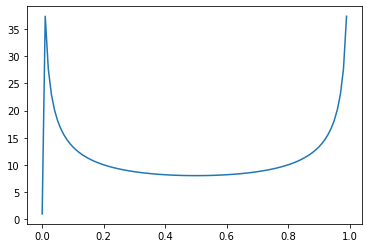

In [69]:
plt.plot(x,pdf_list)
plt.show()